In [127]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [115]:
data = pd.read_csv('/content/Train.csv')

In [116]:
print(data.isnull().sum())

Team1            0
Team2            0
Stadium          0
HostCountry      0
Team1_Venue      0
Team2_Venue      0
Team1_Innings    0
Team2_Innings    0
MonthOfMatch     0
MatchWinner      0
dtype: int64


In [117]:
label_encoder = LabelEncoder()
data['Team1_Innings'] = label_encoder.fit_transform(data['Team1_Innings'])
data['Team2_Innings'] = label_encoder.fit_transform(data['Team2_Innings'])
data['MonthOfMatch'] = label_encoder.fit_transform(data['MonthOfMatch'])
data['Team1_Venue'] = label_encoder.fit_transform(data['Team1_Venue'])
data['Team2_Venue'] = label_encoder.fit_transform(data['Team2_Venue'])

In [118]:
test_data = data.tail(400)
train_data = data.iloc[:-400]

X_train = train_data.drop('MatchWinner', axis=1)
y_train = train_data['MatchWinner']
X_test = test_data.drop('MatchWinner', axis=1)
y_test = test_data['MatchWinner']


In [119]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [120]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [121]:
print(X_train.shape, X_test.shape, y_train_categorical.shape, y_test_categorical.shape)


(2108, 9) (400, 9) (2108, 16) (400, 16)


In [122]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(y_train_categorical.shape[1], activation='softmax'))

In [123]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [124]:
history = model.fit(X_train_scaled, y_train_categorical, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test_categorical))


Epoch 1/100
66/66 [==============================] - 1s 7ms/step - loss: 2.5871 - accuracy: 0.1594 - val_loss: 2.4161 - val_accuracy: 0.1700
Epoch 2/100
66/66 [==============================] - 0s 4ms/step - loss: 2.2909 - accuracy: 0.2339 - val_loss: 2.2426 - val_accuracy: 0.2300
Epoch 3/100
66/66 [==============================] - 0s 3ms/step - loss: 2.1901 - accuracy: 0.2481 - val_loss: 2.1862 - val_accuracy: 0.2400
Epoch 4/100
66/66 [==============================] - 0s 3ms/step - loss: 2.1226 - accuracy: 0.2600 - val_loss: 2.1521 - val_accuracy: 0.2425
Epoch 5/100
66/66 [==============================] - 0s 4ms/step - loss: 2.0951 - accuracy: 0.2785 - val_loss: 2.1314 - val_accuracy: 0.2500
Epoch 6/100
66/66 [==============================] - 0s 4ms/step - loss: 2.0607 - accuracy: 0.2761 - val_loss: 2.1018 - val_accuracy: 0.2675
Epoch 7/100
66/66 [==============================] - 0s 3ms/step - loss: 2.0339 - accuracy: 0.2932 - val_loss: 2.0857 - val_accuracy: 0.2750
Epoch 8/100
6

In [125]:
loss, accuracy = model.evaluate(X_test_scaled, y_test_categorical)
print(f'Test Accuracy: {accuracy}')

13/13 [==============================] - 0s 2ms/step - loss: 1.4202 - accuracy: 0.4600
Test Accuracy: 0.46000000834465027


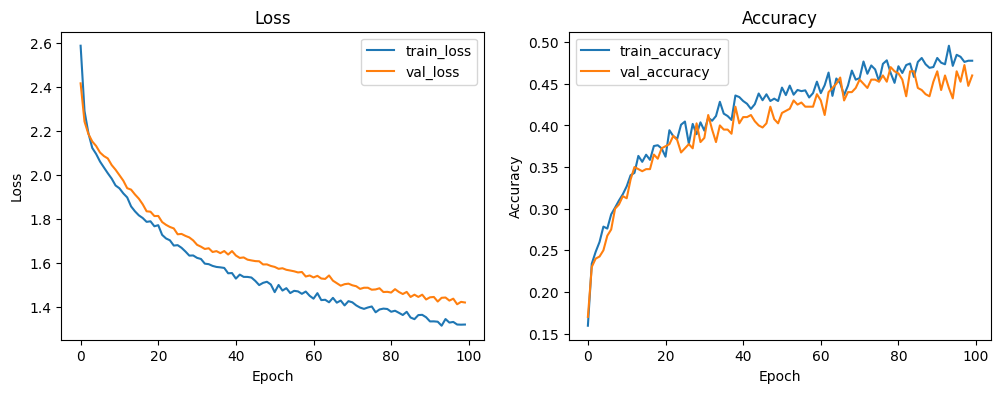

In [126]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [131]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test_scaled)
predicted_labels = np.argmax(predictions, axis=1)

classification_report = classification_report(y_test, predicted_labels)
print(classification_report)


13/13 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.47      0.94      0.62        48
           2       0.42      0.45      0.43        11
           4       0.52      0.46      0.48        35
           5       0.52      0.79      0.63        52
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         2
           9       0.53      0.47      0.50        40
          10       0.39      0.40      0.40        50
          11       0.00      0.00      0.00         6
          12       0.51      0.50      0.51        38
          13       0.40      0.09      0.15        45
          14       0.30      0.31      0.30        42
          15       0.50      0.12      0.20        16

    accuracy                           0.46       400
   macro avg       0.30    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
